#  Digits classification using K-Nearest Neighbors (KNN)
## Implemented own K-Nearest Neighbors (KNN) algorithm on SKLearn's Digit Dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

In [2]:
import sklearn.neighbors

class KNNClassifier:
    
    def __init__(self, X, y, k = 5):
        """
        Initialize our custom KNN classifier
        PARAMETERS
        X - our training data features
        y - our training data answers
        k - the number of nearest neighbors to consider for classification
        """

        self._model = sklearn.neighbors.BallTree(X)
        self._y = y.reshape(y.size)
        self._k = k
        self._counts = self.getCounts()
        
    def getCounts(self):
        """
        Creates a dictionary storing the counts of each answer class found in y
        RETURNS
        counts - a dictionary of counts of answer classes
        """
        counts = dict({1:0,-1:0})
        for i in np.nditer(self._y):
            i = int(i)
            if i in counts:
                counts[i] += 1
            else:
                counts[i] = 1
        return counts
    
    def majority(self, indices):
        
        """
        Given indices, report the majority label of those points.
        For a tie, report the most common label in the data set.
        PARAMETERS
        indices - an np.array, where each element is an index of a neighbor
        RETURNS
        label - the majority label of our neighbors
        """
        label = 0
        majorityLabel = dict()
        for i in indices[0]:
            if self._y[i] in majorityLabel:
                majorityLabel[self._y[i]] += 1
            else:
                majorityLabel[self._y[i]] = 1
        
        (y_val, count) = max(majorityLabel.items(), key=lambda a: a[1])
        
        maxValue = count
        maxKey = []

        for key, value in majorityLabel.items():
            if maxValue == value :
                maxKey.append(key)
        
        if (len(maxKey) == 1):
            label = maxKey[0]
        else:
            temp_max  = 0
            temp_label = 0
            tie_breaker = self.getCounts()
            for k in maxKey:
                if tie_breaker[k] > temp_max:
                    temp_max = tie_breaker[k]
                    temp_label = k
            label = temp_label
        return label
    
    def classify(self, point):
        """
        Given a new data point, classify it according to the training data X and our number of neighbors k into the appropriate class in our training answers y
        PARAMETERS
        point - a feature vector of our test point
        RETURNS
        ans - our predicted classification
        """
        
        ans = 0
        distance, indices = self._model.query([point], self._k)
        ans = self.majority(indices)
        return ans
    
    def confusionMatrix(self, testX, testY):
        """
        Generate a confusion matrix for the given test set
        PARAMETERS
        testX - an np.array of feature vectors of test points
        testY - the corresponding correct classifications of our test set
        RETURN
        C - an N*N np.array of counts, where N is the number of classes in our classifier
        """
        ConfMatrix = np.array([])
        
        prediction_list  = []
        for i in testX:
            predicted = self.classify(i)
            prediction_list.append(predicted)
        
        testY = testY.reshape(testY.size)
        classes = {}
        for i in testY:
            if i in classes:
                classes[i] += 1
            else:
                classes[i] = 1
                    
        nlabels = len(classes)
        tempConfMatrix = [[0 for j in range(nlabels)] for i in range(nlabels)]
        k = 0
        while(k < len(testY)):
            truth = testY[k]
            prediction = prediction_list[k]
            if truth == -1:
                truth = 0
            if prediction == -1:
                prediction = 0
            if truth == prediction:
                tempConfMatrix[truth][truth] += 1
            if truth != prediction:
                tempConfMatrix[truth][prediction] += 1
            k += 1
        
        tempConfMatrix = np.array(tempConfMatrix)
        ConfMatrix = tempConfMatrix
        return ConfMatrix
    
    def accuracy(self, C):
        """
        Generate an accuracy score for the classifier based on the confusion matrix
        PARAMETERS
        C - an np.array of counts
        RETURN
        score - an accuracy score
        """
        score = np.sum(C.diagonal()) / C.sum()
        return(score)

Let's verify the KNN classifier Class with some unit test.

In [3]:
import unittest

class KNNTester(unittest.TestCase):
    def setUp(self):
        self.x = np.array([[3,1],[2,8], [2,7], [5,2],[3,2],[8,2],[2,4]])
        self.y = np.array([[1, -1, -1, 1, -1, 1, -1]])
        self.knnfive = KNNClassifier(self.x, self.y)
        self.knnthree = KNNClassifier(self.x, self.y, 3)
        self.knnone = KNNClassifier(self.x, self.y, 1)
       
        self.testPoints = np.array([[2,1], [2,6], [4, 4]])
        self.testPointsTruth = np.array([[-1, 1, -1]])
       
    def testCounter(self):
        """
        Test getCounts function from knnclassifier
        """
        self.assertEqual(self.knnfive._counts[1], 3)
        self.assertEqual(self.knnfive._counts[-1], 4)
       
    def testKNNOne(self):
        """
        Test if the classifier returns "correct" (expected) classifications for k = 1
        """
        self.assertEqual(self.knnone.classify(self.testPoints[0]), 1)
       
        self.assertEqual(self.knnone.classify(self.testPoints[1]), -1)
        self.assertEqual(self.knnone.classify(self.testPoints[2]), -1)
   
    def testKNNThree(self):
        """
        Test if the classifier returns "correct" (expected) classifications for k = 3
        """
        self.assertEqual(self.knnthree.classify(self.testPoints[0]), -1)
        self.assertEqual(self.knnthree.classify(self.testPoints[1]), -1)
        self.assertEqual(self.knnthree.classify(self.testPoints[2]), -1)
   
    def testKNNFive(self):
        """
        Test if the classifier returns "correct" (expected) classifications for k = 5
        """
        self.assertEqual(self.knnfive.classify(self.testPoints[0]), -1)
        self.assertEqual(self.knnfive.classify(self.testPoints[1]), -1)
        self.assertEqual(self.knnfive.classify(self.testPoints[2]), -1)
   
    def testConfusion(self):
        C = self.knnfive.confusionMatrix(self.testPoints, self.testPointsTruth)
        self.assertEqual(self.knnfive.accuracy(C), 2/3)
        
    
tests = KNNTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.007s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>


Let's randomly divide the Digits dataset into training and testing sets with a train-test split of 80:20.

Next the the number of examples in training and testing, as well as number of pixels in each image are reported by the report function

Then the model is trained on the train test and it classifies the test set and it's confusion matrix is generated along with the accuracy of the classifier.

View Digit function prints the digits in the dataset

In [4]:

class Numbers:
    def __init__(self):
        #load data from sklearn
        digits = sklearn.datasets.load_digits()

        img = digits.images
        target = digits.target
        self.digitImage = digits.images
        
        n_samples = len(img)
        data = digits.images.reshape((n_samples, -1))
        
        xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(data, target, train_size = 0.8)
        self.train_x = np.array(xtrain)
        self.train_y = np.array(ytrain) 
        self.test_x = np.array(xtest) 
        self.test_y = np.array(ytest)
        
    def report(self):
        """
        Report information about the dataset using the print() function
        """
        
        print("Size of training set : " , self.train_x.shape[0])
        print("Size of testing set : " , self.test_x.shape[0])
        print("Number of pixel in an image : ", self.train_x[1].size)
        

    def classify(self):
        """
        Create a classifier using the training data and generate a confusion matrix for the test data
        """

        knnfive = KNNClassifier(self.train_x, self.train_y)
        conf_matrix = knnfive.confusionMatrix(self.test_x, self.test_y)
        Accuracy = knnfive.accuracy(conf_matrix)
        print(conf_matrix)
        print(Accuracy)

        
    def viewDigit(self, digitImage):
        """
        Display an image of a digit
        PARAMETERS
        digitImage - a data object from the dataset
        """
        plt.gray()
        plt.matshow(digitImage)
        plt.show()
        
test = Numbers()
test.report()
test.classify()

Size of training set :  1437
Size of testing set :  360
Number of pixel in an image :  64
[[32  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  1]
 [ 0  0  0  0  0  0  0  0 27  0]
 [ 0  1  0  1  0  1  0  0  1 34]]
0.9861111111111112


1 and 8 are the numbers that are confused often. Sometimes 5 and 9 are confused with each other. Let's print them out and see why they are confused often.

### Problem 3: Improving KNN on Digits - 30 Points

3.1 Determine which classes are most often confused (from our confusion matrix above), inspect some examples of these digits (using the viewDigit function in our Numbers class), and write a brief (4 - 5 sentences) description of why you think these particular numbers may be misclassified.

3.2 Explore the influence of the number of nearest neighbors (i.e. try changing our K). Plot the relationship between K and accuracy, and write a brief (4 - 5 sentences) description of how this factor impacts our accuracy.

3.3 (Bonus) Explore the influence of the train / test split of our data (i.e. copy our Numbers class into Numbers2 below and try changing the split for our dataset). Plot the relationship between the split % and accuracy, and write a brief (4 - 5 sentences) description of its impact.

<Figure size 432x288 with 0 Axes>

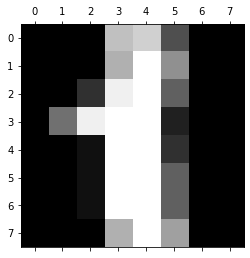

<Figure size 432x288 with 0 Axes>

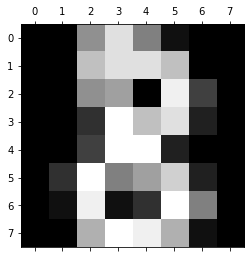

<Figure size 432x288 with 0 Axes>

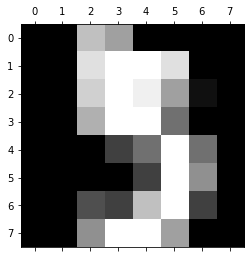

<Figure size 432x288 with 0 Axes>

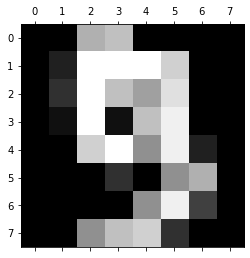

In [5]:
exampleDigit = Numbers()
exampleDigit.viewDigit(exampleDigit.digitImage[1])
exampleDigit.viewDigit(exampleDigit.digitImage[8])

exampleDigit.viewDigit(exampleDigit.digitImage[5])
exampleDigit.viewDigit(exampleDigit.digitImage[9])


Upon executing for K=5 with train/test split of 80/20, the numbers 1 and 8 were often confused. One of the reason they are misclassified is because the values in pixels 2 to 5 (entire columns) form one and they have a rectangular appearance. Likewise values in pixel 1 to 6 form 8 and seems to have bigger rectangular structure. In addition, few of the colored pixels outside the rectangular shape seems to be in the relative position in both 1&8. All these factors are misleading the classifier.

5 and 9 are another which gets confused now and then.They both kind of have the square shape of pixels colored in white and gray and an Inverted L shaped colored structure is attached to it. Since they both have almost identitical pixels colored, they are often misclassified.

Let's explore the influence of the number of nearest neighbors (i.e. try changing our K from 1 to 20) and plot the relationship between K and accuracy

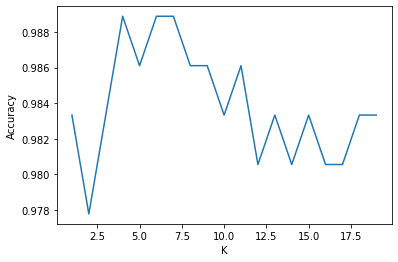

In [6]:
class Numbers2:
    def __init__(self, trainPercentage):
        #load data from sklearn
        digits = sklearn.datasets.load_digits()
        self.trainPercentage = trainPercentage
        
        img = digits.images
        target = digits.target
        self.digitImage = digits.images
        
        n_samples = len(img)
        data = digits.images.reshape((n_samples, -1))
        
        xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(data, target, train_size = self.trainPercentage)
        self.train_x = np.array(xtrain) 
        self.train_y = np.array(ytrain) 
        self.test_x = np.array(xtest)
        self.test_y = np.array(ytest)


    def classify(self, k):
        """
        Create a classifier using the training data and generate a confusion matrix for the test data
        """
        
        knnone = KNNClassifier(self.train_x, self.train_y, k)
        conf_matrix = knnone.confusionMatrix(self.test_x, self.test_y)
        Accuracy = knnone.accuracy(conf_matrix)
        return conf_matrix, Accuracy
        
    def viewDigit(digitImage):
        """
        Display an image of a digit
        PARAMETERS
        digitImage - a data object from the dataset
        """
        plt.gray()
        plt.matshow(digitImage)
        plt.show()
        
test2 = Numbers2(.8)
k_list, accuracy_list = [], []
for i in range(1,20):
    k_list.append(i)
    C, accuracy = test2.classify(i)
    accuracy_list.append(accuracy)
        
plt.plot(k_list, accuracy_list)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

With K=1, we classify our datapoints more closely with respect to a single closest neighbour, which in some cases belong to the same class as our data point and some rare cases doesn't, it still maintains a good accuracy. But classifying a datapoint based on one single neighbour isn't a good approach always. With K=2 we might face tie scenarios which could potentially affect our  as we increase the K. But around K=3 to 7, it often gets higher accuracy because we have a enough neighbours (not to less, not too high) to predict the right class for our datapoint. But as we keep increasing the K value beyond a point, chances of neighbours of various classes being considered gets increased. As a result, our accuracy gets skewed. Often, the plot of K vs Accuracy maintains sort of a bell shaped curve, starting with less accuracy for K=1, then increasing around K=3 to 7, then decreasing beyond that.

Let's explore the influence of the train / test split of our data (i.e. try changing the split for our dataset) and plot the relationship between the split % and accuracy,.

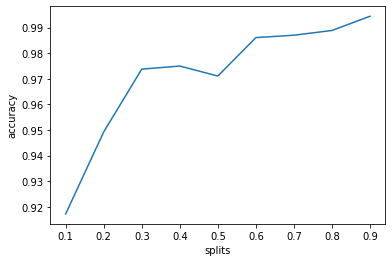

In [7]:
accuracy_list = []
splits = np.arange(0.1,1.0,0.1)
for i in splits:
    test = Numbers2(i)
    C, accuracy = test.classify(5)
    accuracy_list.append(accuracy)
plt.plot(splits, accuracy_list)
plt.xlabel("splits")
plt.ylabel("accuracy")
plt.show()

The accuracy is very low for training splits less than or equal to 50% because with lesser training examples, our model doesn't learn different possibilities or behviours or characteristic features associated with a class. So it underfits the model in most cases. But with increase in training examples, the model learns the features better and knows what to look for and what does the presence and absence of each feature signifies and therefore it begins to classify better, thus increases the accuracy. The accuracy for 80-20 split and 90-10 split are very high and almost similar, but having relatively more testing data means we could better understand how our model performs, therefore 80-20 split is a good split.